In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import tensorflow as tf

In [ ]:
df= pd.read_csv('/content/data_w3_ex1.csv')
df.head()

,1.651000000000000227e+03,4.326452172406379759e+02
0,1691.816327,454.935530
1,1732.632653,471.525248
2,1773.448980,482.506389
3,1814.265306,468.357886
4,1855.081633,482.152531


In [ ]:
x= np.array(df.iloc[0:,0])
y=np.array(df.iloc[:,1])

print(x,'\n\n\n\n',y)

[1691.81632653 1732.63265306 1773.44897959 1814.26530612 1855.08163265
 1895.89795918 1936.71428571 1977.53061224 2018.34693878 2059.16326531
 2099.97959184 2140.79591837 2181.6122449  2222.42857143 2263.24489796
 2304.06122449 2344.87755102 2385.69387755 2426.51020408 2467.32653061
 2508.14285714 2548.95918367 2589.7755102  2630.59183673 2671.40816327
 2712.2244898  2753.04081633 2793.85714286 2834.67346939 2875.48979592
 2916.30612245 2957.12244898 2997.93877551 3038.75510204 3079.57142857
 3120.3877551  3161.20408163 3202.02040816 3242.83673469 3283.65306122
 3324.46938776 3365.28571429 3406.10204082 3446.91836735 3487.73469388
 3528.55102041 3569.36734694 3610.18367347 3651.        ] 



 [454.93552962 471.52524758 482.50638875 468.35788634 482.15253068
 540.02175551 534.58426716 558.34620761 566.42344476 581.39765115
 596.45873727 596.71483169 619.45139015 616.57626499 653.16245988
 666.5199211  670.58975936 669.0228872  678.90932305 707.43696439
 710.76028811 745.19134109 729.845

In [ ]:
print(x.shape,y.shape)

(49,) (49,)


In [ ]:
x=x.reshape(len(x),1)
y=y.reshape(len(y),1)
print(x.shape,y.shape)

(49, 1) (49, 1)


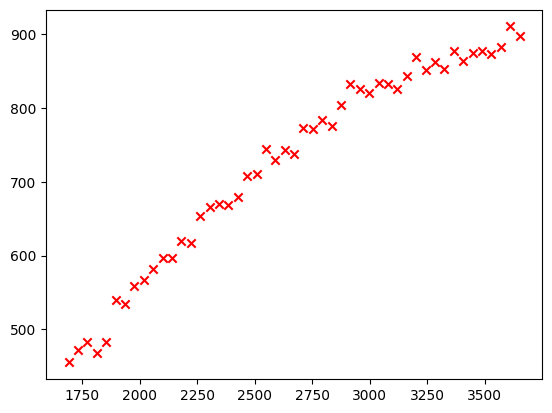

In [ ]:
plt.scatter(x,y,marker='x',c='red')

**Splitting the dataset into train,validation and test**

In [ ]:
# using train_test_split function

X_train,X,Y_train,Y= train_test_split(x,y,test_size=0.40,random_state=1)
X_test,X_val,Y_test,Y_val= train_test_split(X,Y,test_size=0.5,random_state=1)

del X,Y

print('shape of training set:',X_train.shape,Y_train.shape)
print('shape of validation set:',X_val.shape,Y_val.shape)
print('shape of test set:',X_test.shape,Y_test.shape)

shape of training set: (29, 1) (29, 1)
shape of validation set: (10, 1) (10, 1)
shape of test set: (10, 1) (10, 1)


In [ ]:
#normalization or feature scaling

scaler_linear= StandardScaler()

x_ntrain= scaler_linear.fit_transform(X_train)
print(x_ntrain)

[[ 1.37465111]
 [-0.2481671 ]
 [ 1.65688036]
 [ 0.24573409]
 [ 0.17517678]
 [-1.16541218]
 [ 0.8101926 ]
 [-0.45983904]
 [-0.7420683 ]
 [ 0.52796335]
 [ 1.8685523 ]
 [ 0.88074991]
 [-0.17760979]
 [-0.03649516]
 [ 0.31629141]
 [-1.02429755]
 [-0.95374024]
 [ 1.79799499]
 [-1.37708412]
 [-0.31872442]
 [-1.44764143]
 [-0.38928173]
 [-1.09485486]
 [-0.67151098]
 [-0.81262561]
 [-0.88318292]
 [-0.60095367]
 [ 1.58632305]
 [ 1.16297917]]


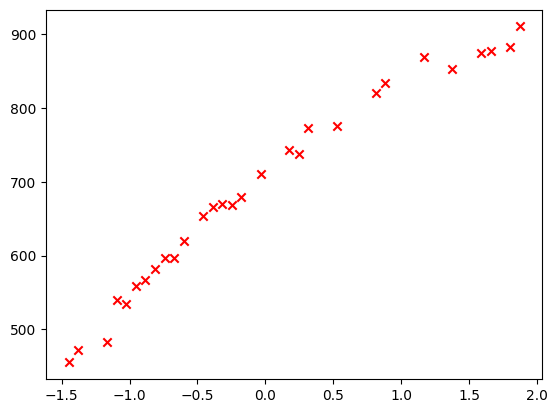

In [ ]:
plt.scatter(x_ntrain,Y_train, marker='x', c='red')

In [ ]:
linear_model= LinearRegression()

linear_model.fit(x_ntrain,Y_train)

LinearRegression()

In [ ]:
yhat= linear_model.predict(x_ntrain)

print(mean_squared_error(Y_train,yhat)/2)

333.38532759495934


In [ ]:
# loop implementaion

error=0

for i in range(len(yhat)):
  error += (yhat[i]-Y_train[i])**2

error= error/(2*len(yhat))
error

array([333.38532759])

You can then compute the MSE for the cross validation set with basically the same equation:

$$J_{cv}(\vec{w}, b) = \frac{1}{2m_{cv}}\left[\sum_{i=1}^{m_{cv}}(f_{\vec{w},b}(\vec{x}_{cv}^{(i)}) - y_{cv}^{(i)})^2\right]$$

As with the training set, you will also want to scale the cross validation set. An *important* thing to note when using the z-score is you have to use the mean and standard deviation of the **training set** when scaling the cross validation set. This is to ensure that your input features are transformed as expected by the model. One way to gain intuition is with this scenario:

* Say that your training set has an input feature equal to `500` which is scaled down to `0.5` using the z-score.
* After training, your model is able to accurately map this scaled input `x=0.5` to the target output `y=300`.
* Now let's say that you deployed this model and one of your users fed it a sample equal to `500`.
* If you get this input sample's z-score using any other values of the mean and standard deviation, then it might not be scaled to `0.5` and your model will most likely make a wrong prediction (i.e. not equal to `y=300`).

You will scale the cross validation set below by using the same `StandardScaler` you used earlier but only calling its [`transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.transform) method instead of [`fit_transform()`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler.fit_transform).

In [ ]:
x_valn= scaler_linear.transform(X_val)
yhat=linear_model.predict(x_valn)
print(f"Mean used to scale the CV set: {scaler_linear.mean_.squeeze():.2f}")
print(f"Standard deviation used to scale the CV set: {scaler_linear.scale_.squeeze():.2f}")

print(mean_squared_error(Y_val,yhat)/2)

Mean used to scale the CV set: 2529.25
Standard deviation used to scale the CV set: 578.48
470.3063689174919


In [47]:
# generating polynomial features

poly =PolynomialFeatures(degree=2, include_bias= False)

x_train_mapped= poly.fit_transform(X_train)
print(x_train_mapped)

[[3.32446939e+03 1.10520967e+07]
 [2.38569388e+03 5.69153528e+06]
 [3.48773469e+03 1.21642933e+07]
 [2.67140816e+03 7.13642157e+06]
 [2.63059184e+03 6.92001341e+06]
 [1.85508163e+03 3.44132786e+06]
 [2.99793878e+03 8.98763690e+06]
 [2.26324490e+03 5.12227747e+06]
 [2.09997959e+03 4.40991429e+06]
 [2.83467347e+03 8.03537368e+06]
 [3.61018367e+03 1.30334262e+07]
 [3.03875510e+03 9.23403257e+06]
 [2.42651020e+03 5.88795177e+06]
 [2.50814286e+03 6.29078059e+06]
 [2.71222449e+03 7.35616168e+06]
 [1.93671429e+03 3.75086222e+06]
 [1.97753061e+03 3.91062732e+06]
 [3.56936735e+03 1.27403833e+07]
 [1.73263265e+03 3.00201591e+06]
 [2.34487755e+03 5.49845073e+06]
 [1.69181633e+03 2.86224248e+06]
 [2.30406122e+03 5.30869813e+06]
 [1.89589796e+03 3.59442907e+06]
 [2.14079592e+03 4.58300716e+06]
 [2.05916327e+03 4.24015335e+06]
 [2.01834694e+03 4.07372437e+06]
 [2.18161224e+03 4.75943199e+06]
 [3.44691837e+03 1.18812462e+07]
 [3.20202041e+03 1.02529347e+07]]


In [50]:
scaler_poly= StandardScaler()

x_train_mapped_scaled= scaler_poly.fit_transform(x_train_mapped)
print(x_train_mapped_scaled
      )

[[ 1.37465111  1.39477385]
 [-0.2481671  -0.33583093]
 [ 1.65688036  1.75383563]
 [ 0.24573409  0.13063646]
 [ 0.17517678  0.0607712 ]
 [-1.16541218 -1.06228837]
 [ 0.8101926   0.72828321]
 [-0.45983904 -0.51961025]
 [-0.7420683  -0.74958973]
 [ 0.52796335  0.42085435]
 [ 1.8685523   2.03442666]
 [ 0.88074991  0.80782964]
 [-0.17760979 -0.27241979]
 [-0.03649516 -0.14237045]
 [ 0.31629141  0.2015774 ]
 [-1.02429755 -0.96235823]
 [-0.95374024 -0.91077963]
 [ 1.79799499  1.93982063]
 [-1.37708412 -1.20411593]
 [-0.31872442 -0.39816639]
 [-1.44764143 -1.24924042]
 [-0.38928173 -0.45942616]
 [-1.09485486 -1.01286114]
 [-0.67151098 -0.69370838]
 [-0.81262561 -0.80439538]
 [-0.88318292 -0.85812535]
 [-0.60095367 -0.63675136]
 [ 1.58632305  1.66245665]
 [ 1.16297917  1.13677221]]


In [53]:
model= LinearRegression()
model.fit(x_train_mapped_scaled,Y_train)

yhat= model.predict(x_train_mapped_scaled)
print(mean_squared_error(yhat,Y_train)/2)


54.667273605095176


In [56]:
X_val_mapped=poly.transform(X_val)
X_val_mapped_scaled= scaler_poly.transform(X_val_mapped)
yhat= model.predict(X_val_mapped_scaled)

print(mean_squared_error(Y_val,yhat)/2)

29.327408643439167


**Creating more polynomials and finding the best one**

In [62]:
train_mses = []
cv_mses = []
models = []
polys = []
scalers = []

for degree in range (1,11):
  poly= PolynomialFeatures(degree,include_bias=False)
  X_train_mapped= poly.fit_transform(X_train)
  polys.append(poly)

  Scaler_poly= StandardScaler()
  X_train_mapped_scaled= Scaler_poly.fit_transform(X_train_mapped)
  scalers.append(Scaler_poly)

  model=LinearRegression()
  model.fit(X_train_mapped_scaled,Y_train)

  models.append(model)

  yhat= model.predict(X_train_mapped_scaled)
  mse_train= mean_squared_error(Y_train,yhat)/2
  train_mses.append(mse_train)

  X_val_mapped= poly.transform(X_val)
  X_val_mapped_scaled= Scaler_poly.transform(X_val_mapped)

  yhat = model.predict(X_val_mapped_scaled)

  cv_mse= mean_squared_error(Y_val,yhat)/2
  cv_mses.append(cv_mse)


In [63]:
#selecting the best model
print(cv_mses)
degree= np.argmin(cv_mses)+1
degree

[470.3063689174919, 29.327408643439167, 26.61299889077892, 24.58794793297472, 21.362012012117418, 63.317111010045025, 80.03797517257992, 115.97511481094568, 100.37295389696577, 71.04727343994645]


5

In [66]:
#test set
X_test_mapped= polys[degree-1].transform(X_test)
X_test_mapped_scaled= scalers[degree-1].transform(X_test_mapped)

yhat= models[degree-1].predict(X_test_mapped_scaled)
print(train_mses[degree-1])
print(cv_mses[degree-1])
print(mean_squared_error(Y_test,yhat))


53.16868421515819
21.362012012117418
276.4607945172785
